# importing Packages


In [2]:
import numpy
import pandas
import sklearn
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [3]:
#Hide all the warnings in jupyter notebook
import warnings
warnings.filterwarnings('ignore')

In [4]:
Hospital_data=pandas.read_csv('./desktop/Hospital.csv')

In [4]:
Hospital_data

,Date of joining,Pt Name,Room No,Doc Bill,Med Bill,Room Bill,Others Bill
0,26/03/2012,RangaSwamy,1,2000,3000,2500,3000
1,26/03/2012,lakshmi,3,2000,2500,3500,2000
2,26/03/2012,sailaja,2,5000,1000,2000,500
3,26/03/2012,chamandi,4,7000,4000,3000,3000
4,26/03/2012,aruna,6,3000,1000,2000,3000
5,26/03/2012,swapna,5,3000,2000,5000,500
6,27/03/2012,RangaSwamy,1,1000,3000,2500,3000
7,27/03/2012,lakshmi,3,1000,2500,3500,2000
8,27/03/2012,sailaja,2,4000,1000,2000,500
9,27/03/2012,chamandi,4,6000,4000,3000,3000


In [5]:
Hospital_data_X=Hospital_data[['Pt Name','Room No','Date of joining','Med Bill','Room Bill']]
Hospital_data_Y=Hospital_data[['Doc Bill']]

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(Hospital_data_X,Hospital_data_Y,test_size=0.20)

In [7]:
X_train

,Pt Name,Room No,Date of joining,Med Bill,Room Bill
12,RangaSwamy,1,28/03/2012,3000,2500
4,aruna,6,26/03/2012,1000,2000
28,aruna,6,30/03/2012,1000,2000
5,swapna,5,26/03/2012,2000,5000
14,sailaja,2,28/03/2012,1000,2000
7,lakshmi,3,27/03/2012,2500,3500
20,sailaja,2,29/03/2012,1000,2000
1,lakshmi,3,26/03/2012,2500,3500
19,lakshmi,3,29/03/2012,2500,3500
21,chamandi,4,29/03/2012,4000,3000


In [8]:
X_test

,Pt Name,Room No,Date of joining,Med Bill,Room Bill
17,swapna,5,28/03/2012,2000,5000
3,chamandi,4,26/03/2012,4000,3000
27,chamandi,4,30/03/2012,4000,3000
6,RangaSwamy,1,27/03/2012,3000,2500
9,chamandi,4,27/03/2012,4000,3000
29,swapna,5,30/03/2012,2000,5000


In [9]:
Name_encoder=preprocessing.LabelEncoder()
Name_encoder.fit(pandas.DataFrame(X_train['Pt Name']))

LabelEncoder()

In [10]:
X_train[['Pt Name']]=Name_encoder.transform(X_train[['Pt Name']])

In [11]:
Name_scaler=StandardScaler()
Name_scaler.fit(pandas.DataFrame(X_train['Pt Name']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
X_train[['Pt Name']]=Name_scaler.transform(X_train[['Pt Name']])

In [13]:
X_train.head()

,Pt Name,Room No,Date of joining,Med Bill,Room Bill
12,-1.460915,1,28/03/2012,3000,2500
4,-0.866645,6,26/03/2012,1000,2000
28,-0.866645,6,30/03/2012,1000,2000
5,1.510438,5,26/03/2012,2000,5000
14,0.916167,2,28/03/2012,1000,2000


In [14]:
dateofjoining_encoder=preprocessing.LabelEncoder()
dateofjoining_encoder.fit(pandas.DataFrame(X_train['Date of joining']))

LabelEncoder()

In [15]:
X_train[['Date of joining']]=dateofjoining_encoder.transform(X_train[['Date of joining']])

In [16]:
dateofjoining_scaler=StandardScaler()
dateofjoining_scaler.fit(pandas.DataFrame(X_train['Date of joining']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
X_train[['Date of joining']]=dateofjoining_scaler.transform(X_train[['Date of joining']])

In [18]:
X_train.head()

,Pt Name,Room No,Date of joining,Med Bill,Room Bill
12,-1.460915,1,0.00000,3000,2500
4,-0.866645,6,-1.44463,1000,2000
28,-0.866645,6,1.44463,1000,2000
5,1.510438,5,-1.44463,2000,5000
14,0.916167,2,0.00000,1000,2000


In [19]:
roomno_scaler=StandardScaler()
roomno_scaler.fit(pandas.DataFrame(X_train['Room No']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
X_train[['Room No']]=roomno_scaler.transform(X_train[['Room No']])

In [21]:
medbill_scaler=StandardScaler()
medbill_scaler.fit(pandas.DataFrame(X_train['Med Bill']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
X_train[['Med Bill']]=medbill_scaler.transform(X_train[['Med Bill']])

In [23]:
roombill_scaler=StandardScaler()
roombill_scaler.fit(pandas.DataFrame(X_train['Room Bill']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [24]:
X_train[['Room Bill']]=roombill_scaler.transform(X_train[['Room Bill']])

In [25]:
#Othersbill_scaler=StandardScaler()
#Othersbill_scaler.fit(pandas.DataFrame(X_train['Others Bill']))

In [26]:
#X_train[['Others Bill']]=Othersbill_scaler.transform(X_train[['Others Bill']])

In [27]:
X_train.head()

,Pt Name,Room No,Date of joining,Med Bill,Room Bill
12,-1.460915,-1.359541,0.00000,0.990814,-0.023577
4,-0.866645,1.453302,-1.44463,-1.041625,-0.589419
28,-0.866645,1.453302,1.44463,-1.041625,-0.589419
5,1.510438,0.890734,-1.44463,-0.025405,2.805636
14,0.916167,-0.796972,0.00000,-1.041625,-0.589419


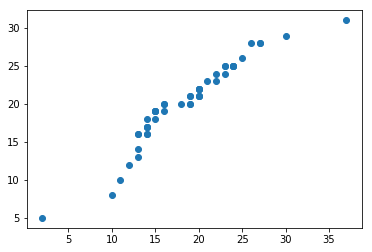

In [5]:
mean=20
sigma=5

scatter_data_1=numpy.sort(numpy.random.normal(mean,sigma,50).astype(int))
scatter_data_2=numpy.sort(numpy.random.normal(mean,sigma,50).astype(int))

plt.scatter(scatter_data_1,scatter_data_2)

In [28]:
X_train

,Pt Name,Room No,Date of joining,Med Bill,Room Bill
12,-1.460915,-1.359541,0.000000,0.990814,-0.023577
4,-0.866645,1.453302,-1.444630,-1.041625,-0.589419
28,-0.866645,1.453302,1.444630,-1.041625,-0.589419
5,1.510438,0.890734,-1.444630,-0.025405,2.805636
14,0.916167,-0.796972,0.000000,-1.041625,-0.589419
7,0.321897,-0.234404,-0.722315,0.482704,1.108108
20,0.916167,-0.796972,0.722315,-1.041625,-0.589419
1,0.321897,-0.234404,-1.444630,0.482704,1.108108
19,0.321897,-0.234404,0.722315,0.482704,1.108108
21,-0.272374,0.328165,0.722315,2.007034,0.542266


In [29]:
X_train_original=X_train
X_train=X_train.values
Y_train=Y_train.values

In [30]:
logistic_regression=LogisticRegression()

In [31]:
logistic_regression.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
Y_pred=logistic_regression.predict(X_train)

In [33]:
Y_pred

array([2000, 3000, 3000, 3000, 5000, 2000, 5000, 2000, 2000, 2000, 2000,
       2000, 5000, 3000, 3000, 3000, 2000, 2000, 2000, 5000, 2000, 2000,
       1000, 5000], dtype=int64)

In [34]:
X_test.head()

,Pt Name,Room No,Date of joining,Med Bill,Room Bill
17,swapna,5,28/03/2012,2000,5000
3,chamandi,4,26/03/2012,4000,3000
27,chamandi,4,30/03/2012,4000,3000
6,RangaSwamy,1,27/03/2012,3000,2500
9,chamandi,4,27/03/2012,4000,3000


In [35]:
medbill_scaler=StandardScaler()
medbill_scaler.fit(pandas.DataFrame(X_test['Med Bill']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:

X_test[['Med Bill']]=medbill_scaler.transform(X_test[['Med Bill']])

In [37]:
dateofjoining_encoder=preprocessing.LabelEncoder()
dateofjoining_encoder.fit(pandas.DataFrame(X_test['Date of joining']))

LabelEncoder()

In [38]:
X_test[['Date of joining']]=dateofjoining_encoder.transform(X_test[['Date of joining']])

In [39]:
dateofjoining_scaler=StandardScaler()
dateofjoining_scaler.fit(pandas.DataFrame(X_test['Date of joining']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [40]:

X_test[['Date of joining']]=dateofjoining_scaler.transform(X_test[['Date of joining']])

In [41]:
X_test

,Pt Name,Room No,Date of joining,Med Bill,Room Bill
17,swapna,5,0.301511,-1.299867,5000
3,chamandi,4,-1.507557,0.928477,3000
27,chamandi,4,1.206045,0.928477,3000
6,RangaSwamy,1,-0.603023,-0.185695,2500
9,chamandi,4,-0.603023,0.928477,3000
29,swapna,5,1.206045,-1.299867,5000


In [42]:
roombill_scaler=StandardScaler()
roombill_scaler.fit(pandas.DataFrame(X_test['Room Bill']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
X_test[['Room Bill']]=roombill_scaler.transform(X_test[['Room Bill']])

In [44]:
X_test.head()

,Pt Name,Room No,Date of joining,Med Bill,Room Bill
17,swapna,5,0.301511,-1.299867,1.392694
3,chamandi,4,-1.507557,0.928477,-0.573462
27,chamandi,4,1.206045,0.928477,-0.573462
6,RangaSwamy,1,-0.603023,-0.185695,-1.065001
9,chamandi,4,-0.603023,0.928477,-0.573462


In [45]:
#othersbill_scaler=StandardScaler()
#othersbill_scaler.fit(pandas.DataFrame(X_test['Others Bill']))

In [46]:
#X_test[['Others Bill']]=othersbill_scaler.transform(X_test[['Others Bill']])

In [47]:
X_test.head()

,Pt Name,Room No,Date of joining,Med Bill,Room Bill
17,swapna,5,0.301511,-1.299867,1.392694
3,chamandi,4,-1.507557,0.928477,-0.573462
27,chamandi,4,1.206045,0.928477,-0.573462
6,RangaSwamy,1,-0.603023,-0.185695,-1.065001
9,chamandi,4,-0.603023,0.928477,-0.573462


In [48]:
Name_encoder=preprocessing.LabelEncoder()
Name_encoder.fit(pandas.DataFrame(X_test['Pt Name']))

LabelEncoder()

In [49]:
X_test[['Pt Name']]=Name_encoder.transform(X_test[['Pt Name']])

In [50]:
Name_scaler=StandardScaler()
Name_scaler.fit(pandas.DataFrame(X_test['Pt Name']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
X_test[['Pt Name']]=Name_scaler.transform(X_test[['Pt Name']])

In [52]:
roomno_scaler=StandardScaler()
roomno_scaler.fit(pandas.DataFrame(X_test['Room No']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [53]:
X_test[['Room No']]=roomno_scaler.transform(X_test[['Room No']])

In [54]:
X_test

,Pt Name,Room No,Date of joining,Med Bill,Room Bill
17,1.212678,0.868243,0.301511,-1.299867,1.392694
3,-0.242536,0.124035,-1.507557,0.928477,-0.573462
27,-0.242536,0.124035,1.206045,0.928477,-0.573462
6,-1.697749,-2.108590,-0.603023,-0.185695,-1.065001
9,-0.242536,0.124035,-0.603023,0.928477,-0.573462
29,1.212678,0.868243,1.206045,-1.299867,1.392694


In [55]:
logistic_regression=LogisticRegression()

In [56]:
logistic_regression.fit(X_test,Y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
Y_pred=logistic_regression.predict(X_test)

In [58]:
Y_pred

array([3000, 7000, 7000, 1000, 7000, 3000], dtype=int64)

In [59]:
print(accuracy_score(Y_test,Y_pred))

0.8333333333333334


In [70]:
decision_tree=tree.DecisionTreeClassifier()

In [71]:
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
Y_pred=decision_tree.predict(X_test)
Y_pred_prob=decision_tree.predict_proba(X_test)

In [75]:
print(accuracy_score(Y_test,Y_pred))

0.3333333333333333


In [76]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
Y_pred=random_forest.predict(X_test)
Y_pred_prob=random_forest.predict_proba(X_test)
print(accuracy_score(Y_test,Y_pred))

0.16666666666666666


In [78]:
print(accuracy_score(Y_test,Y_pred))

0.16666666666666666


In [79]:
naive_bayes=GaussianNB()
naive_bayes.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
Y_pred=naive_bayes.predict(X_test)
Y_pred_prob=naive_bayes.predict_proba(X_test)

In [81]:
print(accuracy_score(Y_test,Y_pred))

0.3333333333333333
